In [66]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

In [67]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(
    n_samples=500, centers=centers, cluster_std=0.4, random_state=0
)

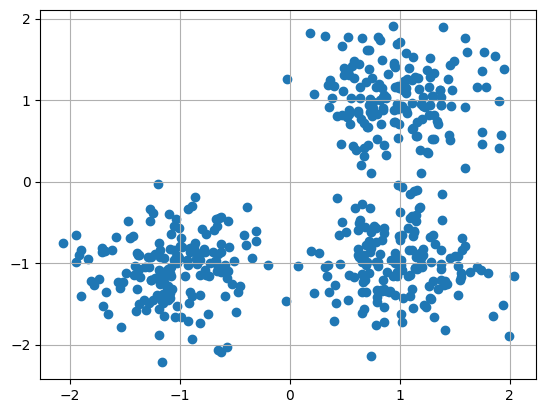

In [68]:
fig1, ax1 = plt.subplots()

ax1.scatter(X[:, 0], X[:, 1])
ax1.grid(True)
plt.show()

epsilon:  maximum distance between two points to be considered neighbors
minPts:  minimum number of points required within neighborhood for a point to be considered a core point. 

In [69]:
eps = 0.25
min_pts = 4

In [70]:
def get_equclidean_distance(pt1, pt2):
    dist = np.sqrt(
        (pt2[0]-pt1[0])**2+(pt2[1]-pt1[1])**2
        )
    
    return dist

In [71]:
def get_core_points(data_set):

    core_points = []
    for center_idx, center_point in enumerate(data_set):

        center_neighbors = []
        for idx, neighbor_point in enumerate(data_set):

            #  ommits the center point from being considered
            if center_idx!=idx:
                dist = get_equclidean_distance(pt1=center_point, pt2=neighbor_point)

                #  Identify center points with neighboring points within distance epsilon
                if dist<=eps:
                    center_neighbors.append(neighbor_point)


        #  Of center points points with neighbors, identify center points with at least the miniumum number of neighbors as core points
        number_of_neighbors = len(center_neighbors)
        if number_of_neighbors>=min_pts:
            core_points.append(center_point)

    return core_points

In [72]:
core_points = get_core_points(data_set=X)

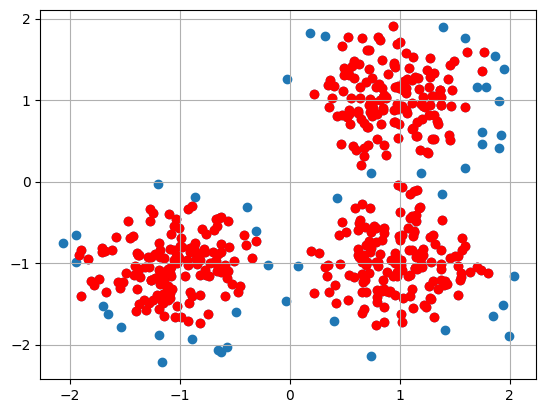

In [74]:
x = [point[0] for point in core_points]
y = [point[-1] for point in core_points]

fig1, ax1 = plt.subplots()

ax1.scatter(X[:, 0], X[:, 1])
ax1.scatter(x, y, c='red')
ax1.grid(True)
plt.show()